In [75]:
import numpy as np
import matplotlib.pyplot as plt
from utils import MatlabRandn
from numpy.random import randn

In [82]:
randn = MatlabRandn()

# bpath2.m

In [83]:
def reset_seed():
    try:
        randn.reset()
        print("Using Matlab Random Numbers")
    except AttributeError:
        np.random.seed(0)
        print("Using numpy Random Numbers")

Using Matlab Random Numbers


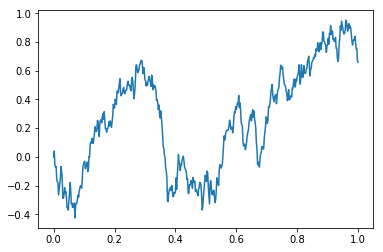

In [90]:
reset_seed()
T = 1
N = 500
dt = T/N
dW = np.sqrt(dt)*randn(N)
dW = np.insert(dW, 0, 0)
W = np.cumsum(dW)
t = np.arange(0, T+dt, dt)
plt.plot(t, W)

# bpath3.m

Using Matlab Random Numbers


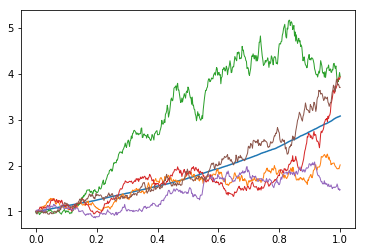

In [92]:
reset_seed()
T = 1
N = 500
M = 1000
dt = T/N
t = np.arange(0, T+dt, dt)
dW_0 = np.zeros((M, 1))
dW = np.hstack([dW_0, np.sqrt(dt)*randn(M, N)])
W = np.cumsum(dW, axis=1)
U = np.exp(np.tile(t, (M, 1)) + 0.5*W)
Umean = np.mean(U, axis=0)
plt.plot(t, Umean)
plt.plot(np.tile(t, (5, 1)).T, U[:5,].T, linewidth=1)

# stint.m

In [86]:
reset_seed()
T = 1
N = 500
dt = T/N
dW = np.sqrt(dt)*randn(N)
dW = np.insert(dW, 0, 0)
W = np.cumsum(dW)

ito = np.sum(W[:-1]*dW[1:])
itoerr = np.abs(ito - 0.5*(W[-1]**2 - T))

strat = np.sum((0.5*(W[:-1]+W[1:]) + 0.5*np.sqrt(dt)*randn(N)) * dW[1:])
straterr = np.abs(strat - 0.5*W[-1]**2)
ito, itoerr, strat, straterr

Using Matlab Random Numbers


(-0.26741580522560493,
 0.01575948446232145,
 0.2353871713525124,
 0.018562461040438794)

# em.m

Using Matlab Random Numbers


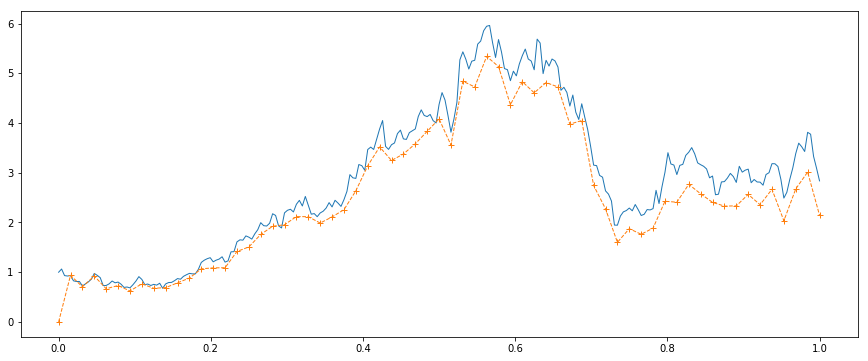

In [91]:
reset_seed()
plt.figure(figsize=(15,6))
lamda = 2
mu = 1
X_0 = 1
T = 1
N = 2**8
dt = T/N
dW = np.sqrt(dt)*randn(N)
dW = np.insert(dW, 0, 0)
W = np.cumsum(dW)
t = np.arange(0, T+dt, dt)

X_true = X_0 * np.exp((lamda-0.5*mu**2)*t + mu*W)
plt.plot(t, X_true, linewidth=1)

R = 4
Dt = R*dt
L = int(N/R)
X_em = np.zeros(L+1)
X_temp = X_0
W_em = W
for j in range(1, L+1):
    Winc = np.sum(dW[R*(j-1)+1:R*j+1])
    X_temp = X_temp + Dt*lamda*X_temp + mu*X_temp*Winc
    X_em[j] = X_temp
plt.plot(np.arange(0, T+Dt, Dt), X_em, "+--", linewidth=1)


In [88]:
X_true[-1] - X_em[-1]

0.6907476291643118